## Описание аппроксимации функции с помощью линейной регрессии с L2-регуляризацией (по нормальному уравнению)

Данный подход используется для аппроксимации функции $f(x)$ на заданном интервале с помощью полиномиальной модели степени $N-1$. Весовые коэффициенты модели находятся аналитически путем решения нормального уравнения с добавлением L2-регуляризации.

**Цель:** Найти вектор параметров $w = [w_0, w_1, \dots, w_{N-1}]^T$, минимизирующий квадратическую функцию потерь с L2-регуляризатором для функции:

$$f(x) = 0.1 \cdot x + 0.1 \cdot x^2 - 0.5 \cdot \sin(2x) + \cos(4x) + 10$$

на интервале $[-3, 4]$ с моделью вида:

$$a(x) = w_0 + \sum_{i=1}^{N-1} w_i \cdot x^i$$

при $N=22$.

**Функция потерь с L2-регуляризатором:**

Функция потерь объединяет среднеквадратическую ошибку (разницу между предсказаниями модели и истинными значениями) и член L2-регуляризации:

$$Q(w) = \frac{1}{l} \sum_{i=1}^{l} (a(x_i, w) - f(x_i))^2 + \frac{\lambda}{2} \cdot \tilde{w}^T \cdot \tilde{w}$$

где:
- $l$ - количество точек в выборке.
- $a(x_i, w)$ - значение модели в точке $x_i$ с параметрами $w$.
- $f(x_i)$ - истинное значение функции в точке $x_i$.
- $\lambda$ - коэффициент L2-регуляризации.
- $\tilde{w} = [0, w_1, \dots, w_{N-1}]^T$ - вектор параметров, где первый параметр $w_0$ не регуляризуется.

**Аналитическое решение (Нормальное уравнение с регуляризацией):**

Оптимальный вектор весовых коэффициентов $w^*$ может быть найден аналитически путем приравнивания градиента функции потерь к нулю. Это приводит к следующей формуле:

$$w^* = (X^T \cdot X + \lambda \cdot I)^{-1} \cdot X^T \cdot Y$$

где:
- $X$ - матрица признаков обучающей выборки.
- $Y$ - вектор истинных значений обучающей выборки.
- $\lambda$ - коэффициент L2-регуляризации.
- $I$ - единичная матрица размером $N \times N$ (в данном случае $22 \times 22$) с нулевым значением в первой ячейке $I_{0,0} = 0$. Это соответствует отсутствию регуляризации для параметра $w_0$.

**Матрица признаков X:**

Матрица признаков $X$ формируется для обучающей выборки. Каждая строка матрицы соответствует одной точке данных $x_i$ из интервала $[-3, 4]$. Столбцы матрицы содержат значения признаков для каждой точки, соответствующих степеням $x$ от 0 до $N-1$:

$$X = \begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{N-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{N-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_l & x_l^2 & \cdots & x_l^{N-1}
\end{pmatrix}$$

где $l$ - размер обучающей выборки. В данном случае $N=22$, поэтому матрица $X$ будет иметь $N=22$ столбца (от $x^0$ до $x^{21}$).

**Вектор истинных значений Y:**

Вектор $Y$ содержит истинные значения функции $f(x)$ для соответствующих точек обучающей выборки:

$$Y = \begin{pmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_l)
\end{pmatrix}$$

**Итоговая оценка качества модели:**

После вычисления оптимальных весов $w^*$ по обучающей выборке, итоговое значение среднего эмпирического риска (среднеквадратической ошибки) для всех отсчетов $x$ (всей выборки, не только обучающей) вычисляется по формуле:

$$Q(a, X) = \frac{1}{l_{total}} \cdot \sum_{i=1}^{l_{total}} (a(x_i) - f(x_i))^2$$

где $l_{total}$ - общее количество отсчетов в полной выборке $x$. Это позволяет оценить, насколько хорошо обученная модель аппроксимирует исходную функцию на всем интервале.

**Реализация в коде (общие моменты):**

В коде для реализации этого подхода необходимо будет:

1.  Определить целевую функцию $f(x)$ и подготовить данные на заданном интервале.
2.  Создать полную матрицу признаков $X$ для всех отсчетов.
3.  Разделить данные на обучающую и, возможно, тестовую выборки (хотя для вычисления $w^*$ используется только обучающая).
4.  Сформировать матрицу признаков $X_{train}$ и вектор истинных значений $Y_{train}$ для обучающей выборки.
5.  Создать модифицированную единичную матрицу $I$ для L2-регуляризации.
6.  Вычислить оптимальные веса $w^*$ по формуле нормального уравнения с регуляризацией.
7.  Вычислить итоговое значение среднего эмпирического риска $Q$ для всех отсчетов $x$ с использованием найденных весов $w^*$.
8.  Вывести полученные веса $w^*$ и значение $Q$.

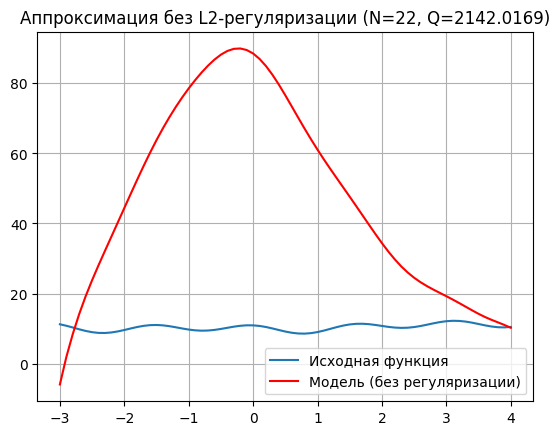

Итоговые веса (w):
[[ 8.83971406e+01]
 [-1.27430248e+01]
 [-2.74585496e+01]
 [ 4.81810209e+00]
 [ 1.33464165e+01]
 [-9.85816895e-01]
 [-5.92870726e+00]
 [ 2.38076547e-01]
 [ 1.62816862e+00]
 [-8.40441627e-02]
 [-2.79071559e-01]
 [ 2.43639814e-02]
 [ 3.01367802e-02]
 [-4.38190877e-03]
 [-1.88291231e-03]
 [ 4.59851559e-04]
 [ 4.00119865e-05]
 [-2.49521511e-05]
 [ 2.31067879e-06]
 [ 4.26910759e-07]
 [-1.21799455e-07]
 [ 8.77332347e-09]]

Итоговая среднеквадратичная ошибка (Q): 2142.0169


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 0.1 * x + 0.1 * x ** 2 - 0.5 * np.sin(2*x) + 1 * np.cos(4*x) + 10


x = np.arange(-3.0, 4.1, 0.1) # значения по оси абсцисс (Ox) с шагом 0,1
y = np.array(func(x)).reshape(-1,1) # значения функции по оси ординат

N = 22  # размер признакового пространства (степень полинома N-1)
lm = 0  # Установлено лямбда = 0 для отсутствия регуляризации

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = lm * np.eye(N)  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем (хотя при lm=0 это не имеет значения)

X_train = X[::2]  # обучающая выборка (входы)
Y_train = y[::2]  # обучающая выборка (целевые значения)

# Решение нормального уравнения: w = (X_train.T @ X_train + lambda * I)^-1 @ X_train.T @ Y_train
# При lambda = 0 это сводится к обычному нормальному уравнению: w = (X_train.T @ X_train)^-1 @ X_train.T @ Y_train
A = np.linalg.inv(X_train.T @ X_train + IL) # Здесь IL будет нулевой матрицей при lm=0
w = A @  X_train.T @ Y_train
a = X@w # Аппроксимация на всей выборке

Q = np.mean((a - y)**2) # Среднеквадратичная ошибка на всей выборке

# Код для отображения финального графика
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(x, y, label='Исходная функция')
ax.plot(x,a, c="red", label='Модель (без регуляризации)')
ax.legend()
plt.title(f'Аппроксимация без L2-регуляризации (N={N}, Q={Q:.4f})')
plt.show()

print(f"Итоговые веса (w):")
print(w)
print(f"\nИтоговая среднеквадратичная ошибка (Q): {Q:.4f}")

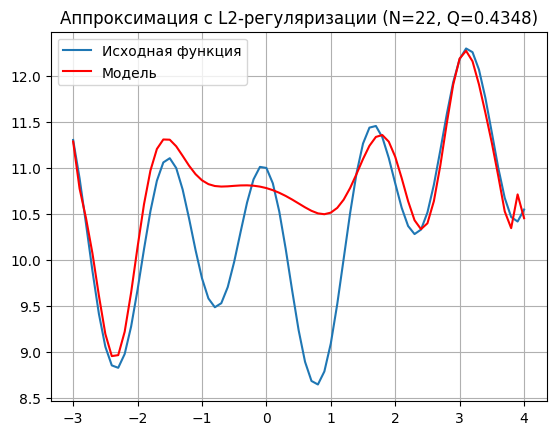

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 0.1 * x + 0.1 * x ** 2 - 0.5 * np.sin(2*x) + 1 * np.cos(4*x) + 10


x = np.arange(-3.0, 4.1, 0.1) # значения по оси абсцисс (Ox) с шагом 0,1
y = np.array(func(x)).reshape(-1,1) # значения функции по оси ординат

N = 22  # размер признакового пространства (степень полинома N-1)
lm = 20  # параметр лямбда для L2-регуляризатора

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = lm * np.eye(N)  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем

X_train = X[::2]  # обучающая выборка (входы)
Y_train = y[::2]  # обучающая выборка (целевые значения)
A = np.linalg.inv(X_train.T @ X_train + IL)
w = A @  X_train.T @ Y_train
a = X@w
Q = np.mean((a - y)**2)
# Код для отображения финального графика
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(x, y, label='Исходная функция') # Использование x вместо coord_x
ax.plot(x,a, c="red", label='Модель') # Использование x вместо coord_x
plt.title(f'Аппроксимация с L2-регуляризации (N={N}, Q={Q:.4f})')
ax.legend()
plt.show()